In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/Sharad/Desktop/Business Analytics/self practice/zomato.csv', encoding = 'ISO-8859-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
Restaurant ID           9551 non-null int64
Restaurant Name         9551 non-null object
Country Code            9551 non-null int64
City                    9551 non-null object
Address                 9551 non-null object
Locality                9551 non-null object
Locality Verbose        9551 non-null object
Longitude               9551 non-null float64
Latitude                9551 non-null float64
Cuisines                9542 non-null object
Average Cost for two    9551 non-null int64
Currency                9551 non-null object
Has Table booking       9551 non-null object
Has Online delivery     9551 non-null object
Is delivering now       9551 non-null object
Switch to order menu    9551 non-null object
Price range             9551 non-null int64
Aggregate rating        9551 non-null float64
Rating color            9551 non-null object
Rating text             9551 non-null o

In [4]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [5]:
df.duplicated().count()

9551

In [6]:
df.shape

(9551, 21)

# City with cheap restaurant

In [7]:
df['Average Cost for two'].min()

0

In [8]:
df['City'][df['Average Cost for two'] == 0].max()

'Varanasi'

# City with expensive restaurant

In [9]:
df['Average Cost for two'].max()

800000

In [10]:
df['City'][df['Average Cost for two'] == 800000].max()

'Jakarta'

# Restaurnt with largest number of votes

In [11]:
df.groupby('Restaurant Name').sum()['Votes'].nlargest()
# df['Restaurant Name'][df['Votes']].value_counts()

Restaurant Name
Barbeque Nation              28142
AB's - Absolute Barbecues    13400
Toit                         10934
Big Chill                    10853
Farzi Cafe                   10098
Name: Votes, dtype: int64

# City with largest number of votes

In [12]:
df['City'][df['Votes']].value_counts()

C:\Users\Sharad\Anaconda3\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


Makati City               1577
Brasí_lia                 1072
Mandaluyong City           942
Rio de Janeiro             613
Sí£o Paulo                 462
Pasay City                 456
Albany                     404
Pasig City                 372
Taguig City                298
Athens                     297
Boise                      239
Augusta                    233
San Juan City              199
Santa Rosa                 186
Gurgaon                    176
Cedar Rapids/Iowa City     165
Dalton                     136
Columbus                   136
Davenport                  103
Quezon City                100
Faridabad                   96
Dubuque                     90
Gainesville                 83
Des Moines                  82
Tagaytay City               79
Orlando                     62
Macon                       55
Rest of Hawaii              53
Pocatello                   53
New Delhi                   50
                          ... 
Mc Millan                    4
Paynesvi

# City with excellent rating

In [13]:
df['Aggregate rating'].max()

4.9

In [14]:
df['City'][df['Aggregate rating'] == 4.9].value_counts()

London                    3
Dubai                     3
Jakarta                   3
New Delhi                 3
Rest of Hawaii            2
Inner City                2
Rio de Janeiro            2
Kolkata                   2
Tampa Bay                 2
Hyderabad                 2
Orlando                   2
Auckland                  2
ÛÁstanbul                 2
Guwahati                  1
Pensacola                 1
Pasig City                1
Pretoria                  1
Ankara                    1
Colombo                   1
Gainesville               1
Dehradun                  1
Pasay City                1
Agra                      1
Des Moines                1
Nagpur                    1
Bhopal                    1
Mandaluyong City          1
Cedar Rapids/Iowa City    1
Lucknow                   1
Augusta                   1
Tangerang                 1
Davenport                 1
Brasí_lia                 1
Macon                     1
Dalton                    1
Mumbai              

In [15]:
df.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

# Restaurant delievering online or not

In [16]:
pd.crosstab(df['Has Online delivery'], df['Is delivering now'])

Is delivering now,No,Yes
Has Online delivery,,
No,7100,0
Yes,2417,34


# Restaurants allowing table booking for not

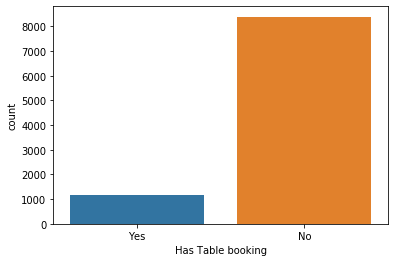

In [17]:
sns.countplot(x = 'Has Table booking', data = df)

# Table booking rate VS Rate

# Best location

In [18]:
a = df.sort_values(by = 'Aggregate rating', ascending = False)[:1000]

In [19]:
a['Locality'].value_counts()

Connaught Place                           22
Athens                                    16
Boise                                     15
Savannah                                  14
Rajouri Garden                            13
Te Aro                                    12
Sector 29                                 10
Defence Colony                             9
Vijay Nagar                                9
Greater Kailash (GK) 1                     8
Macon                                      8
Satyaniketan                               8
Khan Market                                8
Gomti Nagar                                8
Columbus                                   8
Delhi University-GTB Nagar                 7
Augusta                                    7
DLF Mall of India, Sector 18,  Noida       7
Pensacola                                  7
Cedar Rapids                               7
Jubilee Hills                              7
Hauz Khas Village                          6
Downtown  

In [21]:
df.groupby('Locality').sum()['Aggregate rating'].nlargest()
# pd.crosstab(index = df['Locality'],columns = df['Aggregate rating'], margins = True)

Locality
Connaught Place    449.8
Rajouri Garden     355.6
Malviya Nagar      291.4
Defence Colony     276.1
Satyaniketan       275.1
Name: Aggregate rating, dtype: float64